<a href="https://colab.research.google.com/github/nshamid/GPA-Prediction-Based-on-Student-Lifestyle/blob/main/GPA_Prediction_Based_on_Student_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***GPA Prediction Based on Student Lifestyle***

### Teknik Informatika Bilingual 2023
### Mata Kuliah: Pembelajaran Mesin 251P1
### Dosen Pengampu: Assoc. Prof. Dian Palupi Rini, M.Kom., Ph.D.

### Anggota Kelompok:


1.   Nabilah Shamid (09021382328147)
2.   Indrina Nur Chairunnisya (09021382328157)
3.   Azka Hukma Tsabita (09021382328159)
4.   Shalaisya Fattiha Ramadhani (09021382328161)
5.   Afny Chiara Wildani Nst (09021382328167)



### **Dataset Information**
Dataset: Student Lifestyle Dataset

Link Dataset (https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset)

Dataset Student Lifestyle memberikan gambaran rinci tentang pola gaya hidup siswa dan korelasinya dengan kinerja akademik, yang direpresentasikan oleh IPK (GPA). Dataset ini bertujuan untuk menganalisis bagaimana faktor gaya hidup sehari-hari mempengaruhi hasil pendidikan dan tingkat kesejahteraan siswa.

Dataset terdiri dari 2.000 sampel (baris) data kebiasaan harian siswa, mencakup aspek belajar, aktivitas fisik, hingga tingkat stres. Berikut adalah atribut umum yang digunakan untuk analisis:


| Fitur (Atribut) | Keterangan |
| :--- | :--- |
| **Study_Hours_Per_Day** | Jumlah jam yang dihabiskan untuk belajar per hari |
| **Extracurricular_Hours_Per_Day** | Jumlah jam partisipasi dalam kegiatan ekstrakurikuler |
| **Sleep_Hours_Per_Day** | Rata-rata jam tidur per hari |
| **Social_Hours_Per_Day** | Jumlah jam yang dihabiskan untuk bersosialisasi |
| **Physical_Activity_Hours_Per_Day** | Jumlah jam aktivitas fisik/olahraga per hari |
| **GPA** | Target: Indeks Prestasi Kumulatif (Ukuran kinerja akademik) |
| **Stress_Level** | Tingkat stres siswa (diturunkan dari jam belajar dan jam tidur) |


# **1. Install packages**

In [ ]:
%%capture
!pip uninstall pandas numpy -y
!pip install -U scikit-learn
!pip install -U ppscore
!pip install -q ptitprince
!pip install pandas numpy

In [ ]:
!pip install --force-reinstall numpy==1.26.4 pandas==2.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 146.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 31.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3

# **2. Load libraries**

In [ ]:
# ******************* Data manipulation *******************
import pandas as pd
import numpy as np

# ******************* Data visualization ******************
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import ptitprince as pt
from mpl_toolkits.mplot3d import Axes3D

# ******************* Statistics *************************
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ppscore as pps
from sklearn.feature_selection import mutual_info_regression

# ******************* Data preprocessing ********************
from sklearn.model_selection import train_test_split

# ******************* Models ***************************
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ******************* Metric ***********************
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ****************** Others ************************
import warnings
warnings.filterwarnings('ignore')

# **3. Load data**

In [ ]:
data = pd.read_csv('/content/student_lifestyle_dataset.csv')
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


# **4. EDA**

In [ ]:
# Checking data size.
print(f"Dataset: {data.shape[0]} rows and {data.shape[1]} columns")

Dataset: 2000 rows and 8 columns


In [ ]:
# Checking name variables.
print(data.columns)

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


In [ ]:
# Checking data types.
print(data.dtypes)

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object


In [ ]:
# Checking duplicated.
print(data.duplicated().sum())

0


In [ ]:
# Checking missing values.
print(data.isna().sum())

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64


In [ ]:
# Divide in Train(train and validation) and Test.

SEED = 123 # random seed for reproducibility.

data_train, data_test = train_test_split(data,
                                         random_state = SEED,
                                         test_size = 0.2,
                                         stratify = data['Stress_Level'])

print(f"Data train: {data_train.shape[0]} samples")
print(f"Data test: {data_test.shape[0]} samples")

Data train: 1600 samples
Data test: 400 samples


In [ ]:
# Copy data train for EDA.
data_eda = data_train.copy()
data_eda.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
946,947,9.0,3.4,7.0,0.2,4.4,3.68,High
421,422,9.1,1.1,9.4,0.5,3.9,3.58,High
1320,1321,8.1,0.2,7.0,3.9,4.8,3.41,High
1930,1931,8.1,1.8,5.2,0.1,8.8,3.28,High
962,963,6.5,2.1,7.8,3.6,4.0,2.90,Moderate


### **4.1 Univariate Analysis**

#### **Distribution of numerical variables**

In [ ]:
def plot_distribution(feature:str):

    fig, ax = plt.subplots(figsize = (5, 3.7))

    # histogram
    sns.histplot(data = data_eda,
                 x = feature,
                 edgecolor = 'black',
                 color = 'green',
                 ax = ax)
    sns.rugplot(data = data_eda,
                x = feature,
                height = -.02,
                clip_on = False,
                color = 'red',
                ax = ax)
    ax.set_xlabel('')
    ax.set_ylabel('frequency', fontsize = 12, fontweight = 'bold', color = 'black')

    # ECDF
    ax2 = ax.twinx()
    ecdf = ECDF(data_eda[feature])
    ax2.plot(ecdf.x, ecdf.y, color = 'red')
    ax2.tick_params(axis = 'y', labelcolor = 'red', color = 'red')
    ax2.set_ylabel('CDF', fontsize = 12, fontweight = 'bold', color = 'red')
    ax2.set_ylim([0, 1.01])
    ax2.grid(False)

    fig.suptitle(feature, fontsize = 13, fontweight = 'bold', color = 'black')
    fig.show()

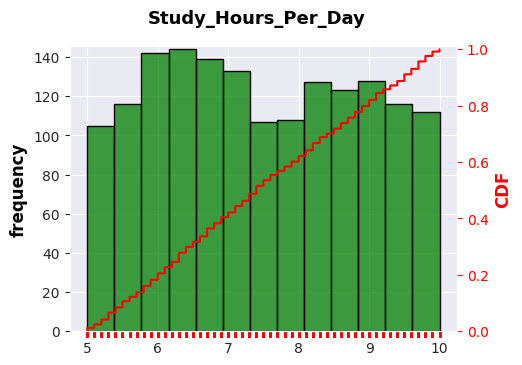

In [ ]:
plot_distribution('Study_Hours_Per_Day')

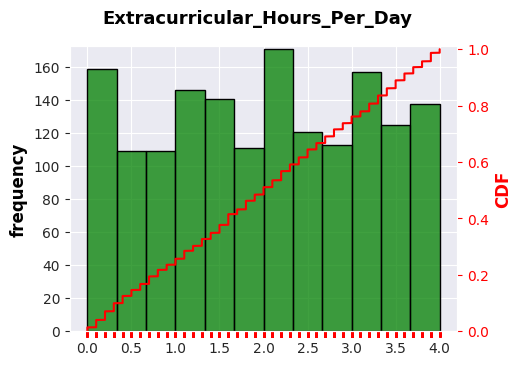

In [ ]:
plot_distribution('Extracurricular_Hours_Per_Day')

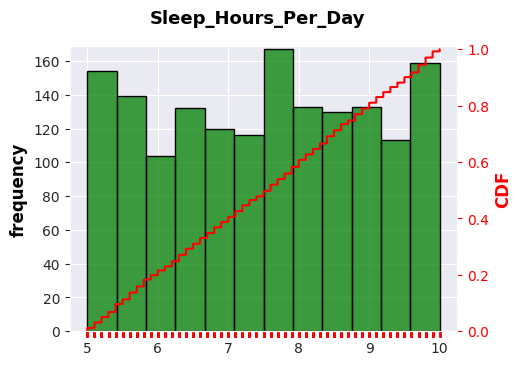

In [ ]:
plot_distribution('Sleep_Hours_Per_Day')

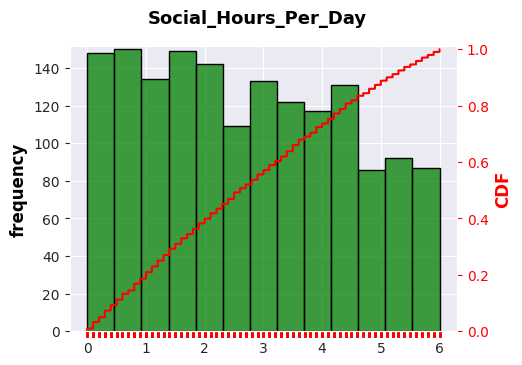

In [ ]:
plot_distribution('Social_Hours_Per_Day')

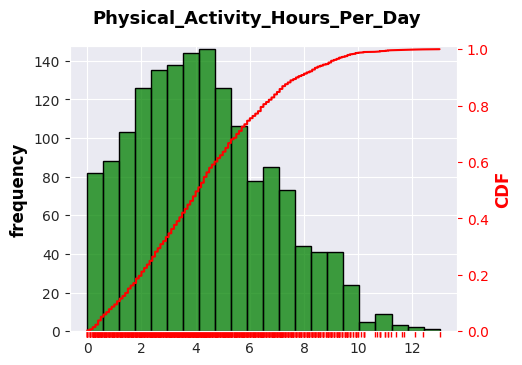

In [ ]:
plot_distribution('Physical_Activity_Hours_Per_Day')

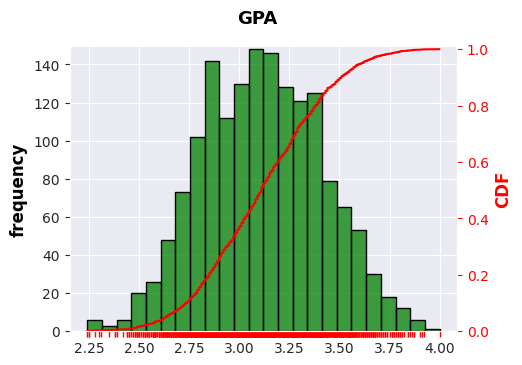

In [ ]:
plot_distribution('GPA')

#### **Distribution of categorical variable**

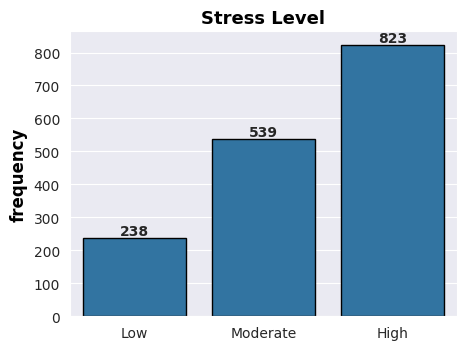

In [ ]:
fig, ax = plt.subplots(figsize = (5, 3.7))

sns.countplot(data = data_eda,
              x = 'Stress_Level',
              edgecolor = 'black',
              order = ['Low', 'Moderate', 'High'],
              ax = ax)
ax.set_xlabel('')
ax.set_ylabel('frequency', fontsize = 12, fontweight = 'bold', color = 'black')
ax.set_title('Stress Level', fontsize = 13, fontweight = 'bold', color = 'black')

for value in ax.containers:
    ax.bar_label(value, fontweight = 'bold')

fig.show()

### **4.2 Bivariate Analysis**

#### **Correlation between numerical variables**

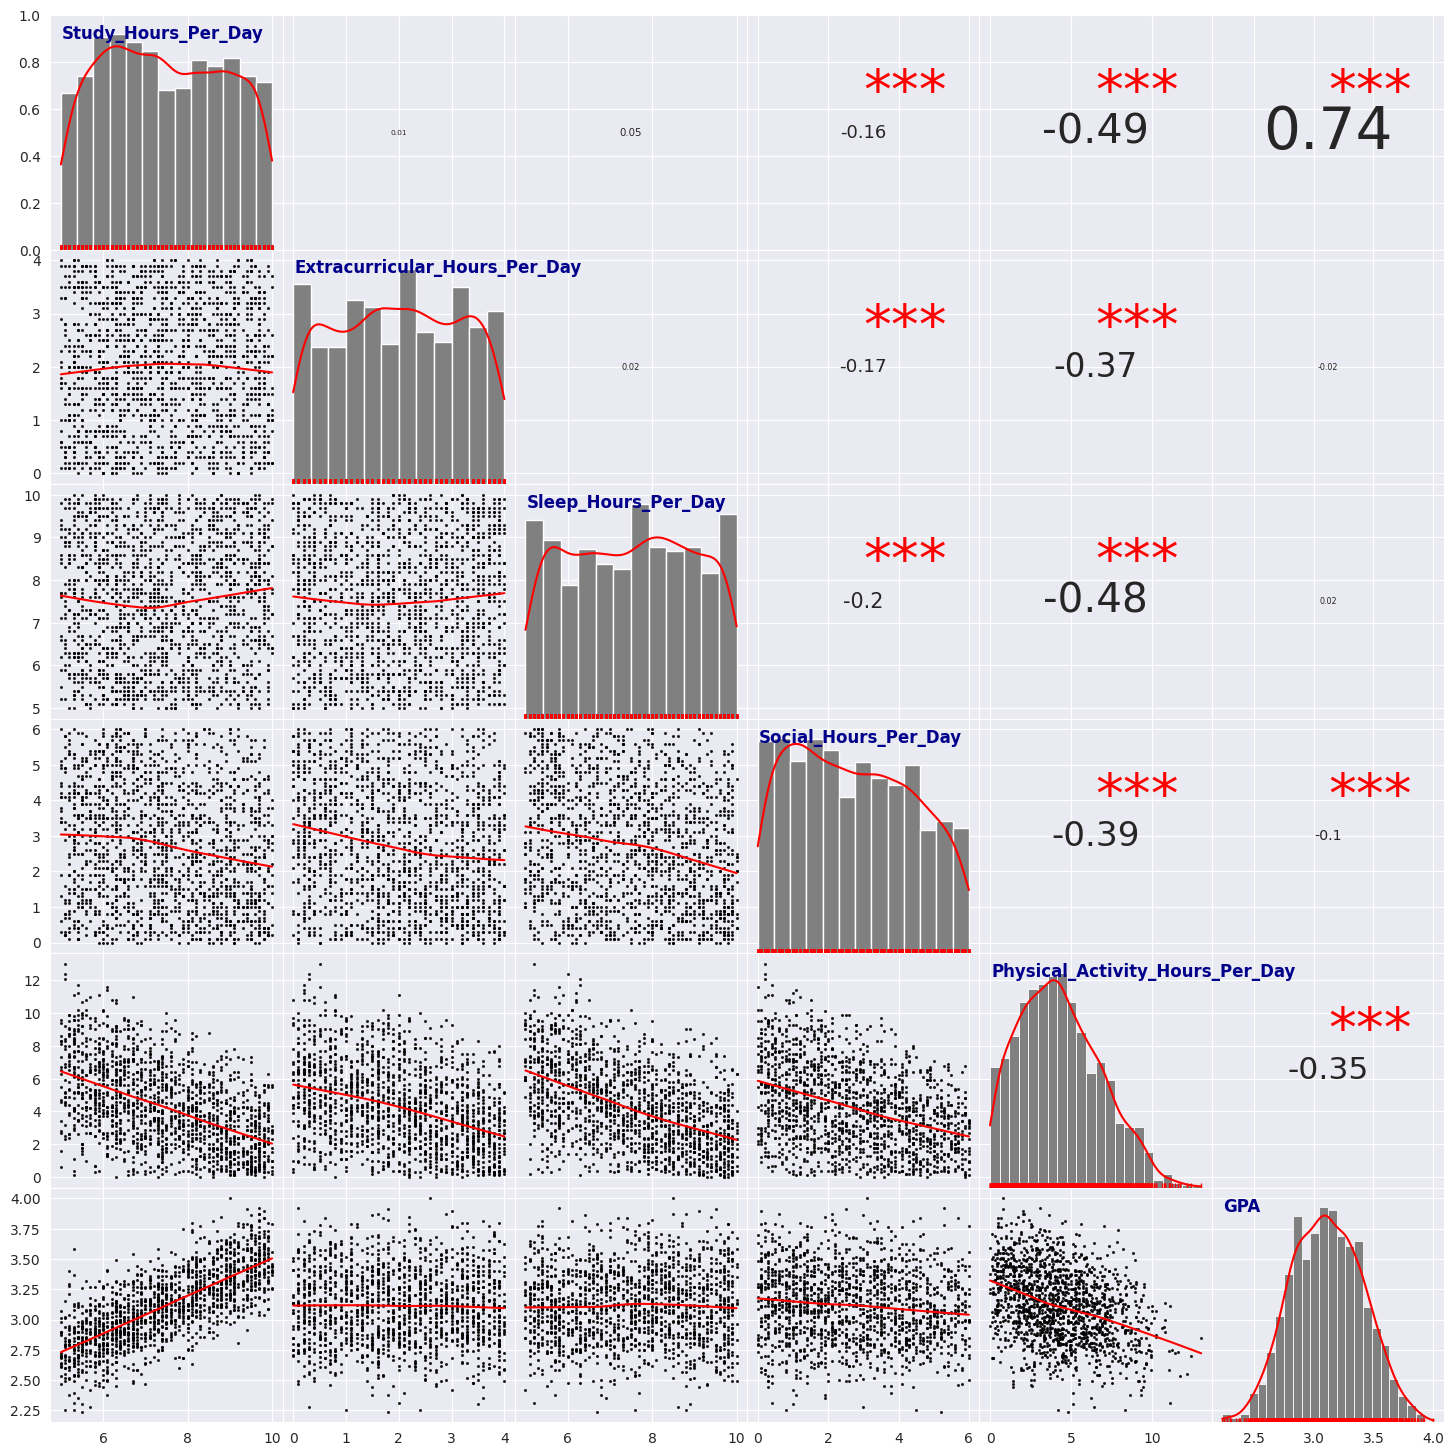

In [ ]:
def histogram(x, **kws):
    ax = sns.histplot(x=x, color='grey', kde=True, alpha = 1.0)
    ax.lines[0].set_color('red')
    ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes, fontweight='bold', color = 'darkblue', fontsize = 12)

def rugplot(x, **kws):
    ax = sns.rugplot(x = x, color = 'red', height = .02, alpha = 1.0)

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 50 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.5, 0.6), xycoords=ax.transAxes, color='red', fontsize=40)

g = sns.PairGrid(data_eda[data_eda.select_dtypes(include = ['float']).columns], diag_sharey = False, despine = False, dropna = True)

g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'red', 'lw': 1.5}, scatter_kws={'color': 'black', 's': 1.5})

g.map_diag(histogram)
g.map_diag(rugplot)
g.map_upper(corrdot)
g.map_upper(corrfunc)

g.fig.subplots_adjust(wspace=0, hspace=0)

for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

#### **Predictive Power Score(PPS)**

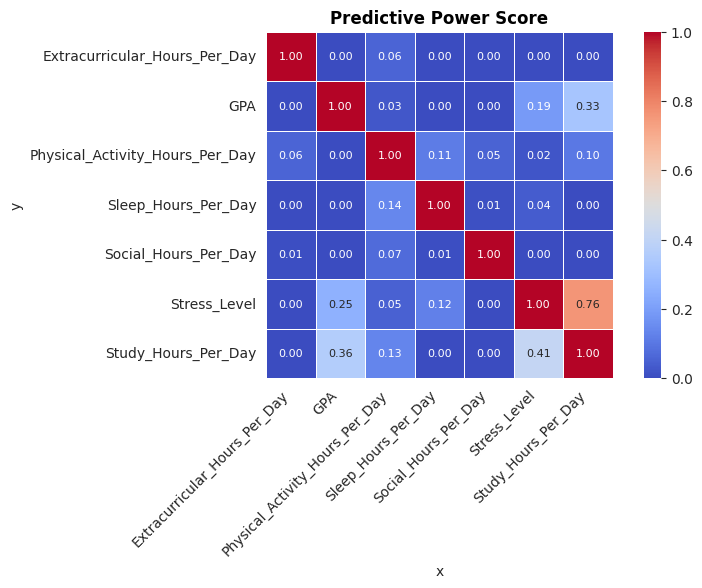

In [ ]:
pps_matrix = pps.matrix(
                        data_eda[data_eda.select_dtypes(include = ['float','object']).columns]
                        )[
                          [
                           'x',
                           'y',
                           'ppscore'
                          ]
                         ].pivot(
                                 values = 'ppscore',
                                 index = 'y',
                                 columns = 'x'
                                )

fig,ax = plt.subplots(figsize = (8, 4.5))
sns.heatmap(pps_matrix,
            annot = True,
            annot_kws = {'fontsize':8},
            fmt = '.2f',
            cmap = 'coolwarm',
            square = True,
            linewidths = 0.5,
            ax = ax)
ax.set_xticklabels(
                    ax.get_xticklabels(),
                    rotation = 45,
                    horizontalalignment = 'right',
                    fontsize = 10
                    )
ax.set_yticklabels(
                    ax.get_yticklabels(),
                    fontsize = 10
                    )
ax.set_title(
            "Predictive Power Score",
            fontsize = 12,
            fontweight = 'bold',
            color = 'black')
fig.show()

#### **Distribution of numerical variables according to the categorical variable**

In [ ]:
def plot_bivariate(feature:str):
    plt.figure(figsize = (7, 4))
    pt.RainCloud(
                x = 'Stress_Level', # categorical
                y = feature, # numerical
                data = data_eda,
                orient = 'h',
                alpha = 0.8,
                palette = 'bright',
                pointplot = True,
                order = ['Low', 'Moderate', 'High']
                )
    plt.xlabel(feature, fontsize = 12, fontweight = 'bold', color = 'black')
    plt.ylabel('Stress_Level', fontsize = 12, fontweight = 'bold', color = 'black')
    plt.show()

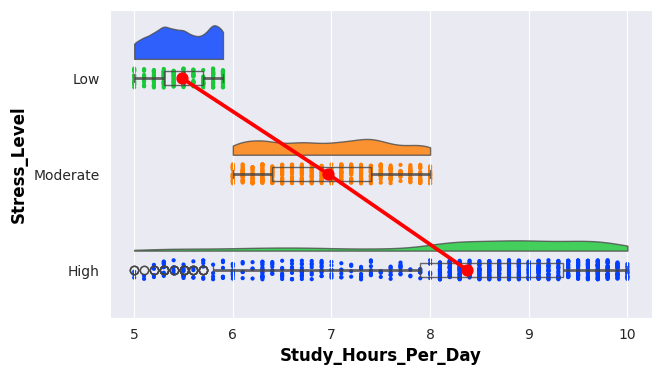

In [ ]:
plot_bivariate('Study_Hours_Per_Day')

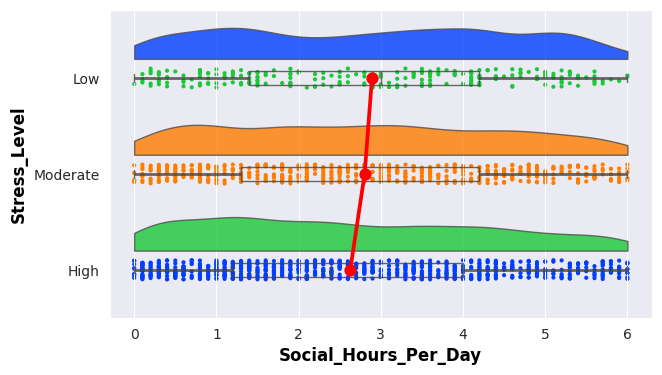

In [ ]:
plot_bivariate('Social_Hours_Per_Day')

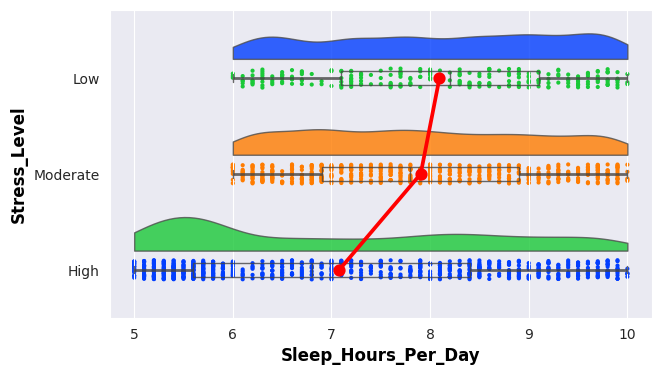

In [ ]:
plot_bivariate('Sleep_Hours_Per_Day')

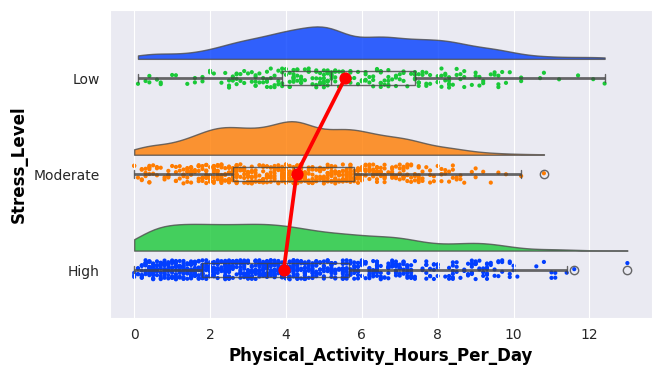

In [ ]:
plot_bivariate('Physical_Activity_Hours_Per_Day')

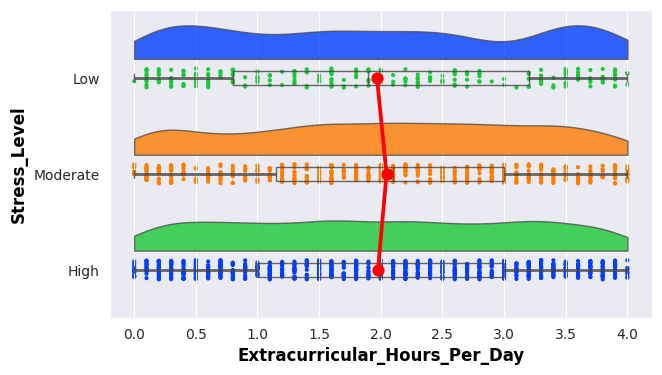

In [ ]:
plot_bivariate('Extracurricular_Hours_Per_Day')

#### **Mutual Information**

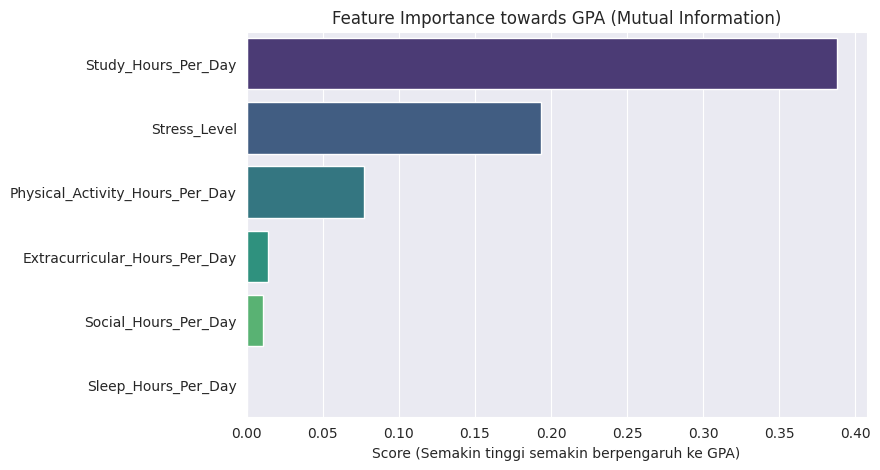

=== Urutan Faktor yang Mempengaruhi GPA ===
                           Feature  Mutual Information
0              Study_Hours_Per_Day            0.388019
5                     Stress_Level            0.193653
4  Physical_Activity_Hours_Per_Day            0.077406
1    Extracurricular_Hours_Per_Day            0.013873
3             Social_Hours_Per_Day            0.010487
2              Sleep_Hours_Per_Day            0.000000


In [ ]:
data_mi = data_eda.copy()

stress_map = {'Low': 0, 'Moderate': 1, 'High': 2}
data_mi['Stress_Level'] = data_mi['Stress_Level'].map(stress_map)

X_mi = data_mi.drop(['Student_ID', 'GPA'], axis=1)
y_mi = data_mi['GPA']

mi_scores = mutual_info_regression(X_mi, y_mi, random_state=SEED)

mi_data = pd.DataFrame({
    'Feature': X_mi.columns,
    'Mutual Information': mi_scores
})

mi_data = mi_data.sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=mi_data, x='Mutual Information', y='Feature', palette='viridis')
plt.title('Feature Importance towards GPA (Mutual Information)')
plt.xlabel('Score (Semakin tinggi semakin berpengaruh ke GPA)')
plt.ylabel('')
plt.show()

print("=== Urutan Faktor yang Mempengaruhi GPA ===")
print(mi_data)

### **4.3 Multivariate Analysis**

#### **Correlation by Stress Level**

<Figure size 1200x1000 with 0 Axes>

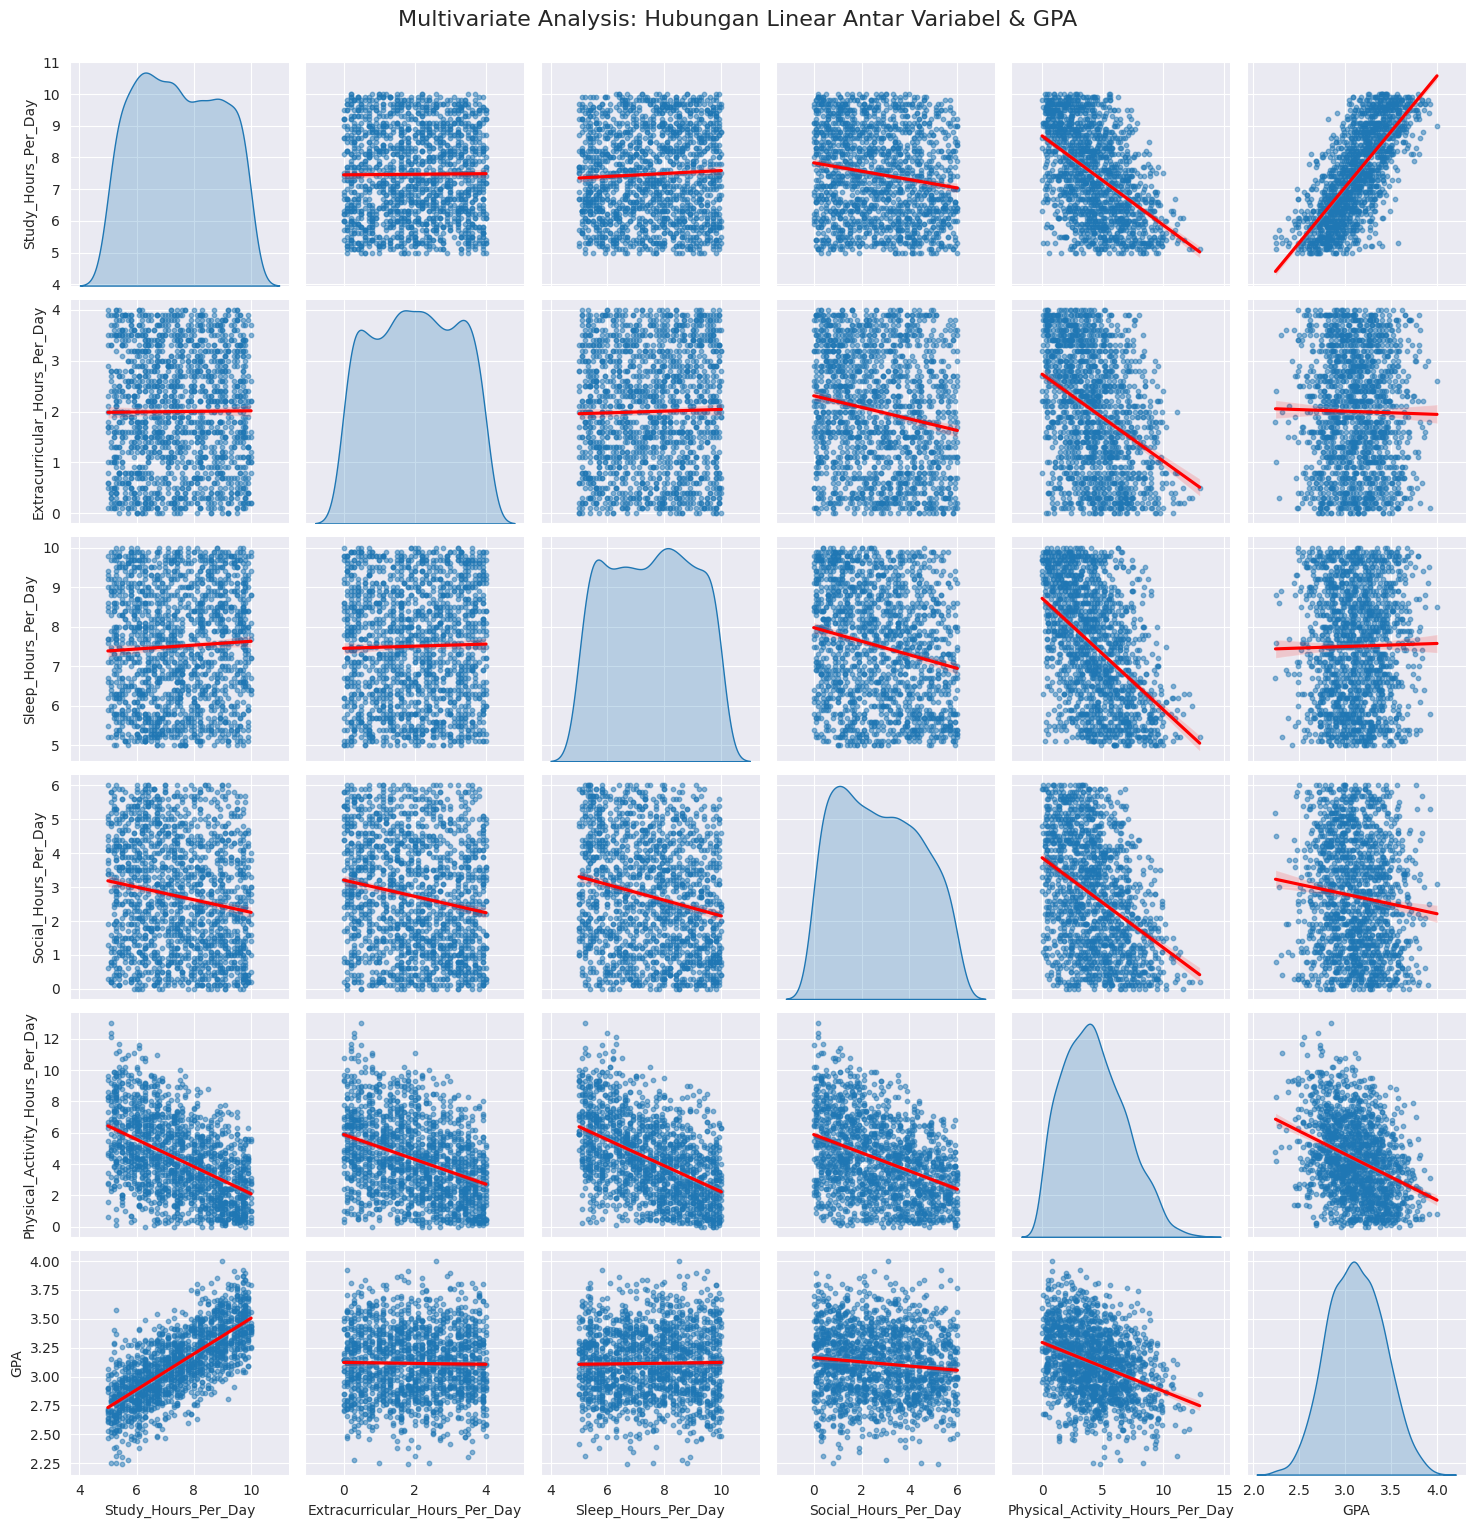

In [ ]:
cols_to_plot = ['Study_Hours_Per_Day',
                'Extracurricular_Hours_Per_Day',
                'Sleep_Hours_Per_Day',
                'Social_Hours_Per_Day',
                'Physical_Activity_Hours_Per_Day',
                'GPA']

plt.figure(figsize=(12, 10))

sns.pairplot(
    data_eda[cols_to_plot],
    kind='reg',
    diag_kind='kde',
    plot_kws={
        'line_kws': {'color': 'red'},
        'scatter_kws': {'alpha': 0.5, 's': 10}
    }
)

plt.suptitle("Multivariate Analysis: Hubungan Linear Antar Variabel & GPA", y=1.02, fontsize=16)
plt.show()

#### **Variance Inflation Factor (VIF)**

In [ ]:
X_vif = data_eda.drop(columns=['Student_ID', 'GPA'])

if X_vif['Stress_Level'].dtype == 'object':
    stress_map = {'Low': 0, 'Moderate': 1, 'High': 2}
    X_vif['Stress_Level'] = X_vif['Stress_Level'].map(stress_map)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns

vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print("=== Hasil Analisis Multikolinearitas (VIF) ===")
print(vif_data.sort_values(by="VIF", ascending=False))

=== Hasil Analisis Multikolinearitas (VIF) ===
                           Feature        VIF
0              Study_Hours_Per_Day  59.788353
2              Sleep_Hours_Per_Day  26.280757
1    Extracurricular_Hours_Per_Day   3.877099
3             Social_Hours_Per_Day   3.179650
4  Physical_Activity_Hours_Per_Day   2.996546
5                     Stress_Level   2.810483


# **5. Data preprocessing**

In [ ]:
def X_y(data_input:pd.DataFrame, target:str):

    data_input = data_input.drop('Student_ID', axis = 1)
    X, y = data_input.drop(target, axis = 1), data_input[target]

    return X,y

In [ ]:
target = 'GPA'

X_train, y_train = X_y(data_train, target)
X_test, y_test = X_y(data_test, target)

X_train.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level
946,9.0,3.4,7.0,0.2,4.4,High
421,9.1,1.1,9.4,0.5,3.9,High
1320,8.1,0.2,7.0,3.9,4.8,High
1930,8.1,1.8,5.2,0.1,8.8,High
962,6.5,2.1,7.8,3.6,4.0,Moderate


In [ ]:
# Encode the Stress_Level
encode_stress = {'Low':0, 'Moderate':1, 'High':2}

X_train['Stress_Level'] = X_train['Stress_Level'].map(encode_stress)
X_test['Stress_Level'] = X_test['Stress_Level'].map(encode_stress)

# **6. Model: Linear Regression**

In [ ]:
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

model.fit(X_train, y_train)

print("Model Polynomial Regression (Degree 2) berhasil dilatih.")

Model Polynomial Regression (Degree 2) berhasil dilatih.


In [ ]:
# Prediction
y_pred_test = model.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("=== Hasil Evaluasi Polynomial Regression (Degree 2) ===")
print(f"R2 Score on Test Set : {r2:.4f}")
print(f"Mean Absolute Error  : {mae:.4f}")
print(f"Root Mean Sq Error   : {rmse:.4f}")

=== Hasil Evaluasi Polynomial Regression (Degree 2) ===
R2 Score on Test Set : 0.5289
Mean Absolute Error  : 0.1636
Root Mean Sq Error   : 0.2023


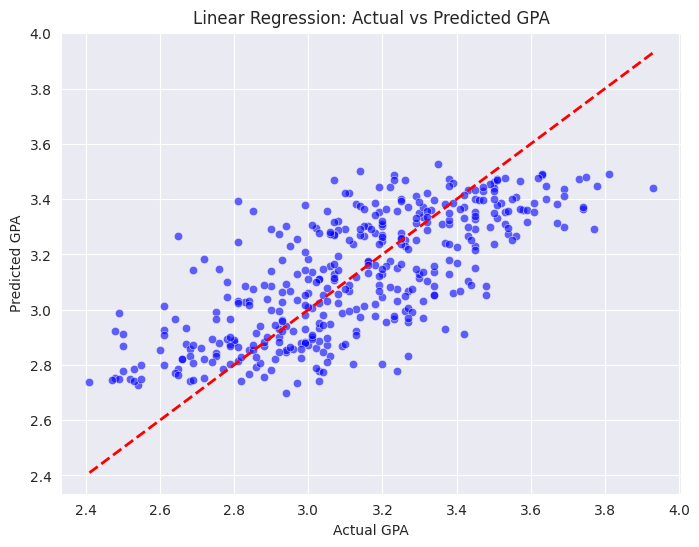

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred_test, color='blue', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Linear Regression: Actual vs Predicted GPA')
plt.show()